**Import Libraries**

In [1]:
# Utsav Anantbhat

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sci_stats
from statsmodels.nonparametric.smoothers_lowess import lowess

**Pup Inflation: Analysing Tweets**

<function matplotlib.pyplot.show(close=None, block=None)>

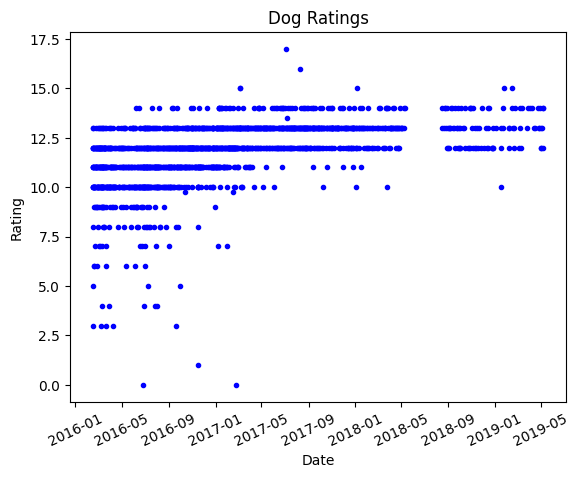

In [2]:
# Load the data from the CSV into a DataFrame.
data = pd.read_csv('dog_rates_tweets.csv', parse_dates=['created_at']) #parse_dates argument to convert 'created_at' column to datetime value

# Find tweets that contain an “n/10” rating (because not all do). 
# Extract the numeric rating. Exclude tweets that don't contain a rating.
tweet_rating_ex = r'(\d+(\.\d+)?)/10' #Regular expression
#tweet_text = data['text']
data['rating'] = data['text'].str.extract(tweet_rating_ex)[0]
#dog_ratings = data['rating']

# Remove outliers: there are a few obvious ones. 
# Exclude rating values that are too large to make sense. (Maybe larger than 25/10?)
data['rating'] = pd.to_numeric(data['rating'])
data = data[data['rating'] <= 25]

# Make sure the 'created_at' column is a datetime value, not a string. 
# You can either do this by applying a function that parses the string to a date (likely using strptime to create a datetime object), 
# or by asking Pandas' read_csv function to parse dates in that column with a parse_dates argument.
# date = pd.to_datetime(data['created_at']) -> key error; used parse_dates while loading data to mitigate issue

# Create a scatter plot of date vs rating, so you can see what the data looks like.
plt.title("Dog Ratings")
plt.xlabel("Date")
plt.ylabel("Rating")
plt.xticks(rotation=25)
plt.plot(data['created_at'], data['rating'], 'b.')
plt.show

**Linear Fitting**

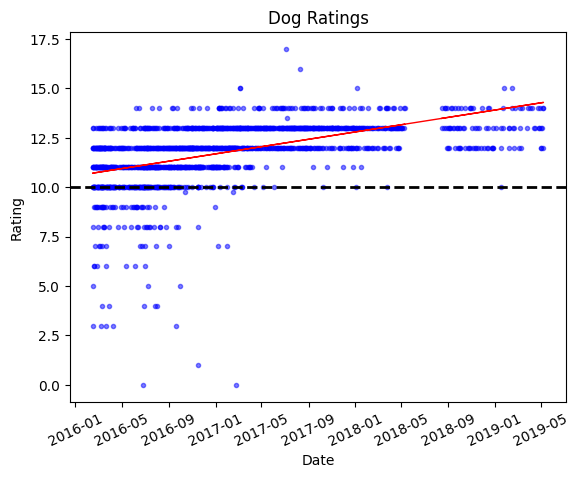

In [3]:
data['timestamp'] = data['created_at'].apply(lambda x: x.timestamp())
#tweet_creation_date = data['created_at']
#tweet_timestamp = data['timestamp']
linear_fit = sci_stats.linregress(data['timestamp'], data['rating'])

# Create a scatter plot of date vs rating, so you can see what the data looks like.
# Copied the plot here since it is in a different cell
plt.title("Dog Ratings")
plt.xlabel("Date")
plt.ylabel("Rating")
plt.xticks(rotation=25)
plt.plot(data['created_at'], data['rating'], 'b.', alpha=0.5)
plt.axhline(y=10, color="black", linestyle="--", linewidth=2)
plt.show

# Best fit line
plt.plot(data['created_at'], data['timestamp'] * linear_fit.slope + linear_fit.intercept, 'r-', linewidth=1)

plt.show()

**Outputs**

In [4]:
data['prediction'] = data['timestamp'] * linear_fit.slope + linear_fit.intercept
data

,id,created_at,text,rating,timestamp,prediction
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09,13.185763
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09,13.181785
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09,13.179609
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09,13.167614
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09,13.163804
...,...,...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0,1.535056e+09,13.507338
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0,1.534957e+09,13.503856
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0,1.534811e+09,13.498710
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0,1.534351e+09,13.482540


In [5]:
linear_fit.slope, linear_fit.intercept

(3.5159299748477226e-08, -40.46415480898918)

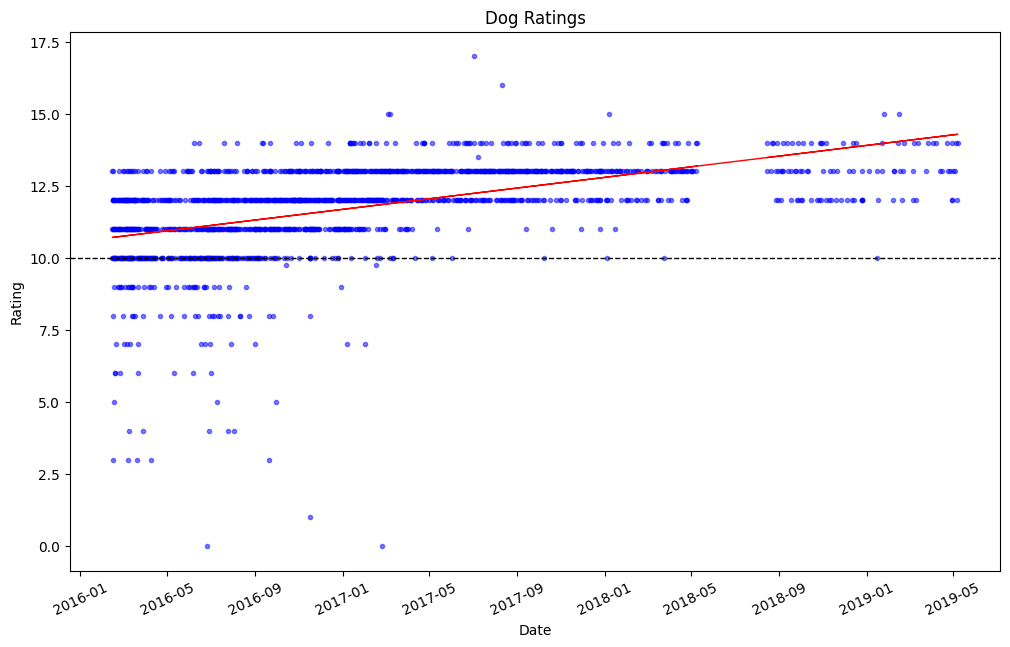

In [6]:
data['timestamp'] = data['created_at'].apply(lambda x: x.timestamp())
#tweet_creation_date = data['created_at']
#tweet_timestamp = data['timestamp']
linear_fit = sci_stats.linregress(data['timestamp'], data['rating'])

# Create a scatter plot of date vs rating, so you can see what the data looks like.
# Copied the plot here since it is in a different cell
plt.figure(figsize=(12,7))
plt.title("Dog Ratings")
plt.xlabel("Date")
plt.ylabel("Rating")
plt.xticks(rotation=25)
plt.plot(data['created_at'], data['rating'], 'b.', alpha = 0.5)
plt.axhline(y=10, color="black", linestyle="--", linewidth=1)
#plt.show()

# Best fit line
plt.plot(data['created_at'], data['timestamp'] * linear_fit.slope + linear_fit.intercept, 'r-', linewidth = 1)
plt.savefig("dog-ratings-e2_1.png")
plt.show()


## E12 Visualization

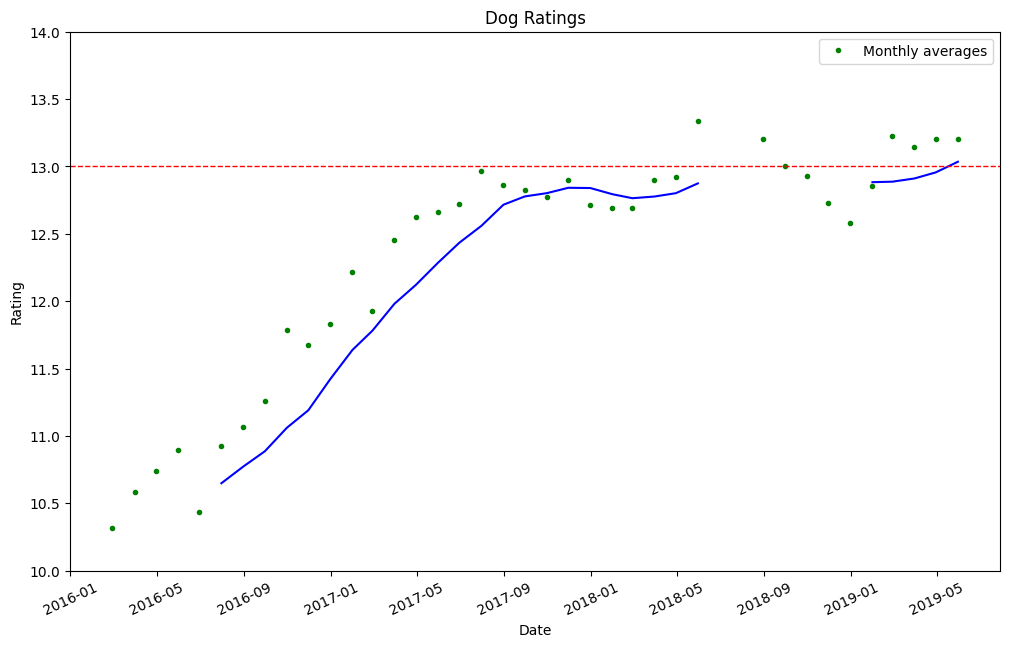

In [50]:
data['timestamp'] = data['created_at'].apply(lambda x: x.timestamp())
linear_fit = sci_stats.linregress(data['timestamp'], data['rating'])

# Convert the timestamps to a time series
time_series = pd.Series(data['rating'].values, index=pd.to_datetime(data['timestamp'], unit='s'))

# Resample to compute monthly averages
monthly_averages = time_series.resample('M').mean()

# Create a scatter plot of date vs rating, so you can see what the data looks like.
plt.figure(figsize=(12,7))
plt.title("Dog Ratings")
plt.xlabel("Date")
plt.ylabel("Rating")
plt.xticks(rotation=25)

# Plot monthly averages
plt.plot(monthly_averages.index, monthly_averages.values, 'g.', label='Monthly averages')

# TODO: Plot the smooth of the monthly averages that shows the trend of the monthly averages plot

# Compute the rolling average with a window size of 12 (for 12 months)
rolling_averages = monthly_averages.rolling(window=6).mean()

# Plot the rolling averages
plt.plot(rolling_averages.index, rolling_averages.values, 'b-')

plt.axhline(y=13, color="red", linestyle="--", linewidth=1)
plt.ylim([10.0, 14.0])

plt.legend()
plt.savefig("dog-ratings-e2_2.png")
plt.show()


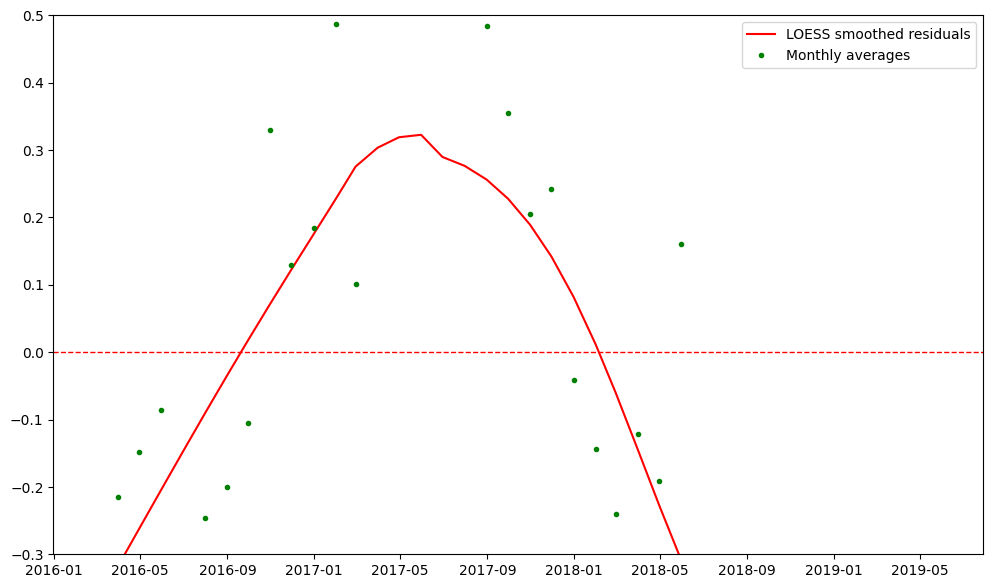

In [51]:
data['residuals'] = data['rating'] - data['prediction']

plt.figure(figsize=(12,7))
#plt.plot(data['created_at'], data['residuals'], 'b.', alpha=0.5)

plt.axhline(y=0.0, color="red", linestyle="--", linewidth=1)
plt.ylim([-0.3, 0.5])

#TODO: Create a LOESS smoothed graph of the residuals of the monthly ratings.

# Calculate the monthly average residuals
residuals_series = pd.Series(data['residuals'].values, index=pd.to_datetime(data['timestamp'], unit='s'))
monthly_residuals = residuals_series.resample('M').mean()

# Generate x values as timestamps
x = monthly_residuals.index.astype('int64').values

# Generate y values as residuals
y = monthly_residuals.values

# Perform LOESS smoothing
smoothed = lowess(y, x)

# The returned variable 'smoothed' is an array with two columns: the first one is x and the second is y.

# Plot the LOESS smoothed data
plt.plot(pd.to_datetime(smoothed[:, 0]), smoothed[:, 1], 'r-', label='LOESS smoothed residuals')
plt.plot(monthly_residuals.index, monthly_residuals.values, 'g.', label='Monthly averages')

plt.legend()
plt.savefig("dog-ratings-e2_3.png")
plt.show()